In [2]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import json
f = open('../database/pair_list.json',)
pairJson = json.load(f)
f.close()

In [3]:
#pairList = pairJson['hitbtc2018']
pairList = pairJson['ftxClassicPair']
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.ftx())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 22198 candles for BTCUSD
Successfully load 20872 candles for ETHUSD
Successfully load 19078 candles for BNBUSD
Successfully load 16621 candles for LTCUSD
Successfully load 9201 candles for DOGEUSD
Successfully load 13464 candles for XRPUSD
Successfully load 13285 candles for SOLUSD
Successfully load 6384 candles for SHIBUSD
Successfully load 15611 candles for LINKUSD
Successfully load 12034 candles for UNIUSD
Successfully load 10751 candles for MATICUSD
Successfully load 7203 candles for AXSUSD
Successfully load 7515 candles for CROUSD
Successfully load 22007 candles for FTTUSD
Successfully load 15458 candles for TRXUSD
Successfully load 16621 candles for BCHUSD
Successfully load 8217 candles for FTMUSD
Successfully load 9801 candles for GRTUSD
Successfully load 11435 candles for AAVEUSD
Successfully load 10751 candles for OMGUSD
Successfully load 7828 candles for LRCUSD
Successfully load 12424 candles for SUSHIUSD
Successfully load 3363 candles for MANAUSD
Successful

,open,high,low,close,volume
timestamp,,,,,
2019-07-21 13:00:00,10529.0,10593.5,10492.0,10535.5,1.052900e+00
2019-07-21 14:00:00,10534.5,10549.5,10345.0,10408.5,0.000000e+00
2019-07-21 15:00:00,10408.5,10483.5,10353.5,10457.0,0.000000e+00
2019-07-21 16:00:00,10454.5,10479.5,10370.0,10378.0,0.000000e+00
2019-07-21 17:00:00,10374.0,10472.5,10330.0,10429.0,8.451135e+01
...,...,...,...,...,...
2022-03-09 15:00:00,42231.0,42615.0,42128.0,42546.0,3.965040e+07
2022-03-09 16:00:00,42546.0,42588.0,42278.0,42458.0,1.834940e+07
2022-03-09 17:00:00,42251.0,42370.0,42115.0,42341.0,1.492884e+07


In [4]:
# -- Indicator variable --
aoParam1 = 6
aoParam2 = 22
stochWindow = 14
willWindow = 14

# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --
    df['AO']= ta.momentum.awesome_oscillator(df['high'],df['low'],window1=aoParam1,window2=aoParam2)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow)

    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,AO,STOCH_RSI,WillR
timestamp,,,,,,,,
2019-07-21 13:00:00,10529.0,10593.5,10492.0,10535.5,1.052900e+00,NaN,NaN,NaN
2019-07-21 14:00:00,10534.5,10549.5,10345.0,10408.5,0.000000e+00,NaN,NaN,NaN
2019-07-21 15:00:00,10408.5,10483.5,10353.5,10457.0,0.000000e+00,NaN,NaN,NaN
2019-07-21 16:00:00,10454.5,10479.5,10370.0,10378.0,0.000000e+00,NaN,NaN,NaN
2019-07-21 17:00:00,10374.0,10472.5,10330.0,10429.0,8.451135e+01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-03-09 15:00:00,42231.0,42615.0,42128.0,42546.0,3.965040e+07,1544.189394,0.850452,-2.326249
2022-03-09 16:00:00,42546.0,42588.0,42278.0,42458.0,1.834940e+07,1442.568182,0.386009,-5.206408
2022-03-09 17:00:00,42251.0,42370.0,42115.0,42341.0,1.492884e+07,1286.446970,0.027634,-20.384890


In [5]:
#Backtest

dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2018-01-01':])

# -- Starting value --
startingBalance = 1000
makerFee = 0
takerFee = 0.0006

# -- Rules --
StopLossActivation = False
takeProfitActivation = True
showLog = False

# -- Hyper parameters --
stochOverBought = 0.8
stochOverSold = 0.2
SlPct = 0.015
TpPct = 0.15
maxShop = 35
maxPositions = 4

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row['AO'] >= 0
        and row['WillR'] < -85
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if (
        (row['AO'] < 0
        and row['STOCH_RSI'] > stochOverSold)
        or row['WillR'] > -10
    ):
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    # previousRow = dfTestList[i].loc[lastIndex]
                                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                # previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Final wallet 3494.90101748432


In [6]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 29 coins | Timeframe : 1h
Period : [2019-07-21 13:00:00] -> [2022-03-09 19:00:00]
Starting balance : 999.85 $

----- General Informations -----
Final balance : 3494.9 $
Performance vs US Dollar : 249.54 %
Bitcoin Buy and Hold Performence : 299.82 %
Performance vs Buy and Hold : -12.57 %
Best trade : +3.79 %, the 2021-05-12 21:00:00
Worst trade : -6.78 %, the 2022-01-27 11:00:00
Worst drawDown : - 35.83 %
Total fees :  1347.72 $

----- Trades Informations -----
Total trades on period : 3007
Number of positive trades : 1947
Number of negative trades :  1060
Trades win rate ratio : 64.75 %
Average trades performance : 0.06 %
Average positive trades : 0.43 %
Average negative trades : -0.61 %

----- Trades Reasons -----
Buy Market Order     3011
Sell Market Order    2987
Sell Take Profit       20
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result 

----- 2019 Performances: 6.51% -----


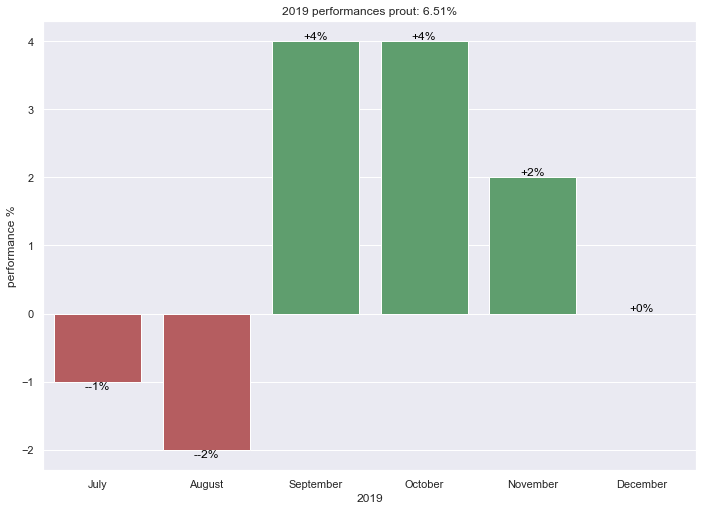

----- 2020 Performances: 54.28% -----


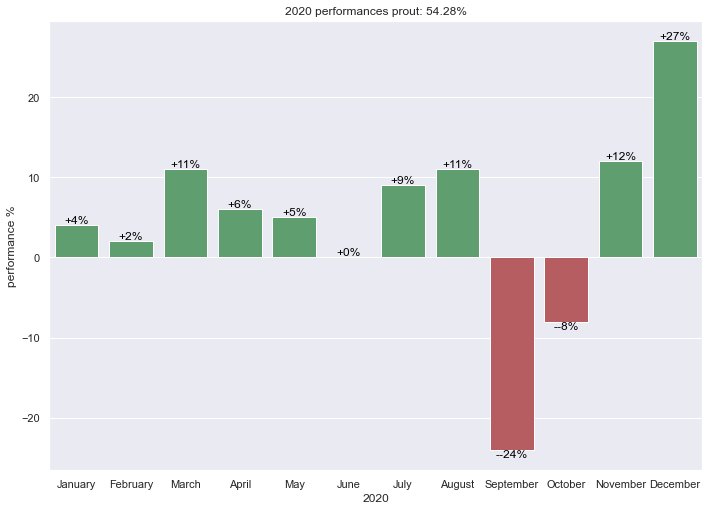

----- 2021 Performances: 115.75% -----


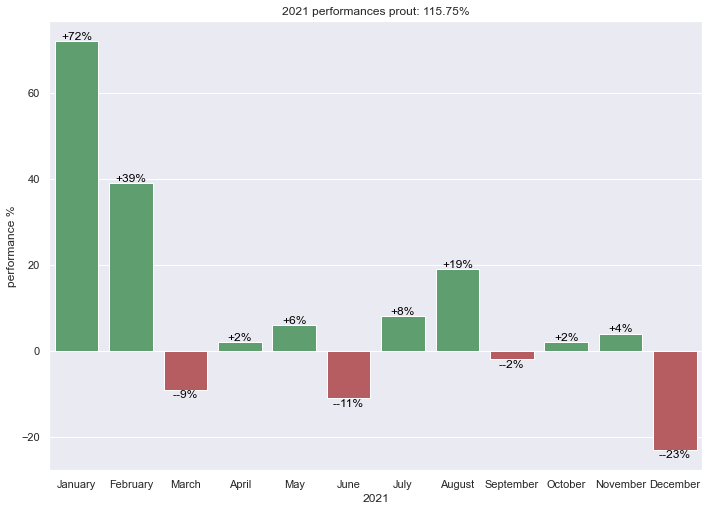

----- 2022 Performances: 5.79% -----


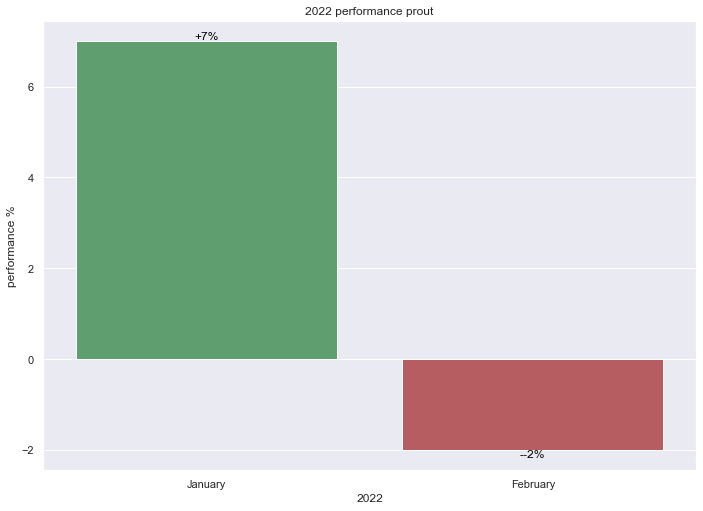

In [7]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)

<ipython-input-8-5a1bc6bbf30e>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])



----- Wallet evolution -----


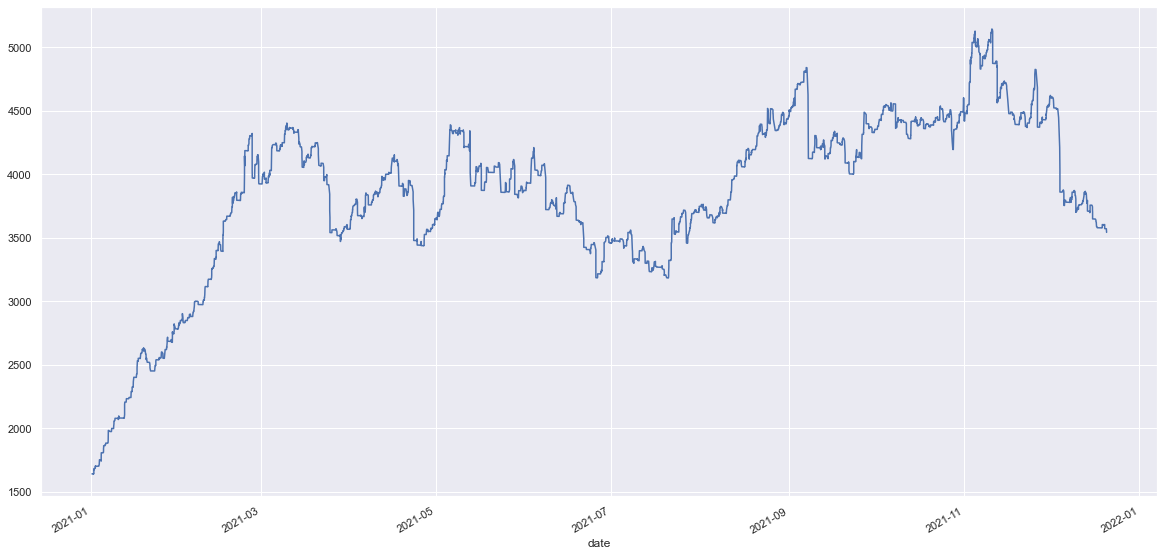

In [8]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])

In [9]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
6008,2022-03-08 22:00:00,LTC/USD,Sell,Sell Market Order,99.750000,0.000000,866.483831,0.000000,3482.807941
6009,2022-03-08 22:00:00,TRX/USD,Buy,Buy Market Order,0.060135,0.519890,0.000000,14400.331600,3482.288051
6010,2022-03-08 23:00:00,LINK/USD,Sell,Sell Market Order,13.094000,0.000000,881.324907,0.000000,3491.441876
6011,2022-03-08 23:00:00,TRX/USD,Sell,Sell Market Order,0.060562,0.000000,1753.444990,0.000000,3497.598018
6012,2022-03-08 23:00:00,SUSHI/USD,Sell,Sell Market Order,2.899100,0.000000,2628.736186,0.000000,3500.194515
6013,2022-03-09 00:00:00,GRT/USD,Sell,Sell Market Order,0.339600,0.000000,3496.998614,0.000000,3496.998614
6014,2022-03-09 17:00:00,TRX/USD,Buy,Buy Market Order,0.061338,0.524550,2622.355548,14250.964189,3496.474064
6015,2022-03-09 17:00:00,GRT/USD,Buy,Buy Market Order,0.348450,0.524471,1747.887384,2508.089230,3495.949593
6016,2022-03-09 18:00:00,ETH/USD,Buy,Buy Market Order,2711.700000,0.524366,873.681509,0.322190,3495.425226
6017,2022-03-09 18:00:00,SOL/USD,Buy,Buy Market Order,87.035000,0.524209,0.000000,10.032255,3494.901017
